In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


sns.set_style('whitegrid')


file_path = 'all_stocks_5yr.csv'
df_all = pd.read_csv(file_path)

# Convert 'date' to datetime
df_all['date'] = pd.to_datetime(df_all['date'])
df_all = df_all.sort_values(by='date')

# 4 companies Analyze
selected_tickers = ['AAPL', 'JPM', 'WMT', 'XOM']

# Filter  DataFrame
df_selected = df_all[df_all['Name'].isin(selected_tickers)].copy()

print("Initial data info:")
print(df_selected.info())
print("\nfiltered data:")
print(df_selected.head())

Initial data inspection:
<class 'pandas.core.frame.DataFrame'>
Index: 5036 entries, 595716 to 2517
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5036 non-null   datetime64[ns]
 1   open    5036 non-null   float64       
 2   high    5036 non-null   float64       
 3   low     5036 non-null   float64       
 4   close   5036 non-null   float64       
 5   volume  5036 non-null   int64         
 6   Name    5036 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 314.8+ KB
None

First few rows of the filtered data:
             date     open     high      low    close     volume  Name
595716 2013-02-08  71.2000  71.6400  71.0700  71.4800    5906823   WMT
608968 2013-02-08  88.5000  88.8000  88.1100  88.6100   11412204   XOM
1259   2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
319039 2013-02-08  48.3300  48.6900  48.2600  48.6300   1521745

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style('whitegrid')

# Define rolling window
file_path = 'all_stocks_5yr.csv'
selected_tickers = ['AAPL', 'JPM', 'WMT', 'XOM']
rolling_window = 50

# Load and Preprocess Data

df_all = pd.read_csv(file_path)

# Correct the 'date' column type and sort.
df_all['date'] = pd.to_datetime(df_all['date'])
df_all = df_all.sort_values(by='date')

# Filter for selected companies
df_selected = df_all[df_all['Name'].isin(selected_tickers)].copy()
-

# Log Returns
df_selected['Log_Return'] = df_selected.groupby('Name')['close'].transform(
    lambda x: np.log(x / x.shift(1))
)

# 50-Day SMA
df_selected['SMA_50'] = df_selected.groupby('Name')['close'].transform(
    lambda x: x.rolling(window=rolling_window).mean()
)

# 50-Day Rolling Mean Volume
df_selected['Volume_Roll_Mean'] = df_selected.groupby('Name')['volume'].transform(
    lambda x: x.rolling(window=rolling_window).mean()
)

# 3.Data Pivoting
df_pivot_close = df_selected.pivot(index='date', columns='Name', values='close')
df_pivot_sma = df_selected.pivot(index='date', columns='Name', values='SMA_50')

# Volume and Log Returns
df_pivot_volume = df_selected.pivot(index='date', columns='Name', values='Volume_Roll_Mean')
df_pivot_log_returns = df_selected.pivot(index='date', columns='Name', values='Log_Return').rolling(window=rolling_window).mean().dropna()

# Calculate initial price
initial_prices = df_pivot_close.iloc[0]

# Normalized DataFrames
df_normalized_close = (df_pivot_close / initial_prices) * 100
df_normalized_sma = (df_pivot_sma / initial_prices) * 100

print("\nFirst few rows of the generated multivariate features for AAPL (for inspection):")
print(df_selected[df_selected['Name'] == 'AAPL'].tail())


First few rows of the generated multivariate features for AAPL (for inspection):
           date     open    high       low   close    volume  Name  \
2513 2018-02-01  167.165  168.62  166.7600  167.78  47230787  AAPL   
2514 2018-02-02  166.000  166.80  160.1000  160.50  86593825  AAPL   
2515 2018-02-05  159.100  163.88  156.0000  156.49  72738522  AAPL   
2516 2018-02-06  154.830  163.72  154.0000  163.03  68243838  AAPL   
2517 2018-02-07  163.085  163.40  159.0685  159.54  51608580  AAPL   

      Log_Return    SMA_50  Volume_Roll_Mean  
2513    0.002088  172.8252       28988856.22  
2514   -0.044360  172.6356       30395483.78  
2515   -0.025302  172.3026       31347628.32  
2516    0.040942  172.0640       32200726.58  
2517   -0.021640  171.7554       32952364.72  


# Normalized Close Price

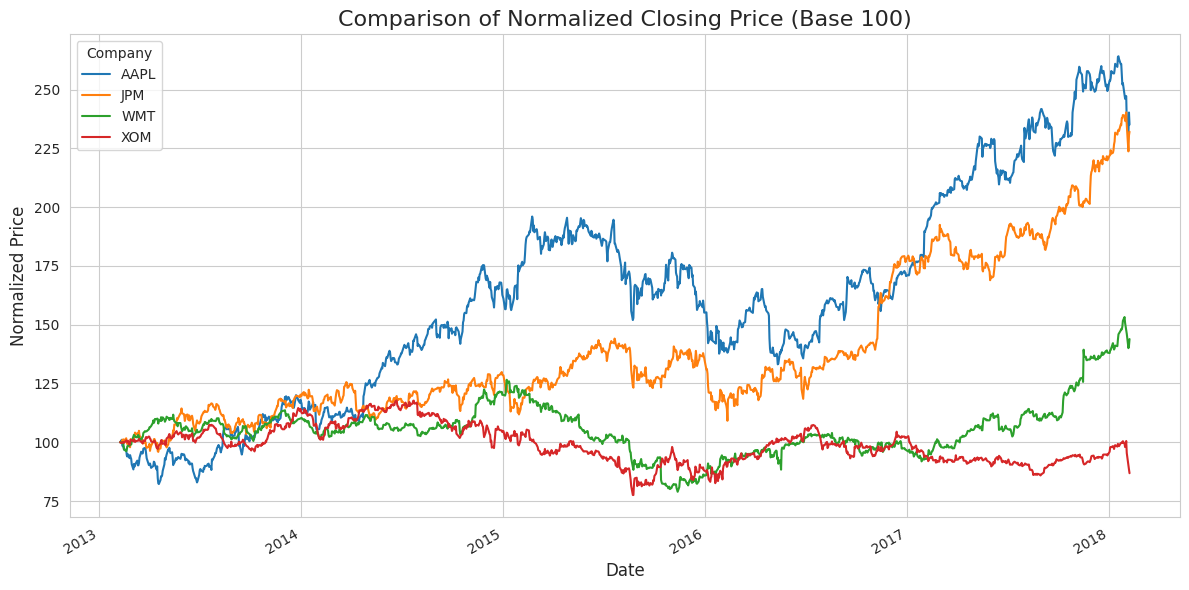

In [ ]:

plt.figure(figsize=(12, 6))
df_normalized_close.plot(ax=plt.gca())
plt.title('Comparison of Normalized Closing Price (Base 100)', fontsize=16)
plt.ylabel('Normalized Price', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend(title='Company')
plt.tight_layout()
plt.savefig('comparison_normalized_close_price.png')
plt.show()

# 50 Day Simple Moving **Average**

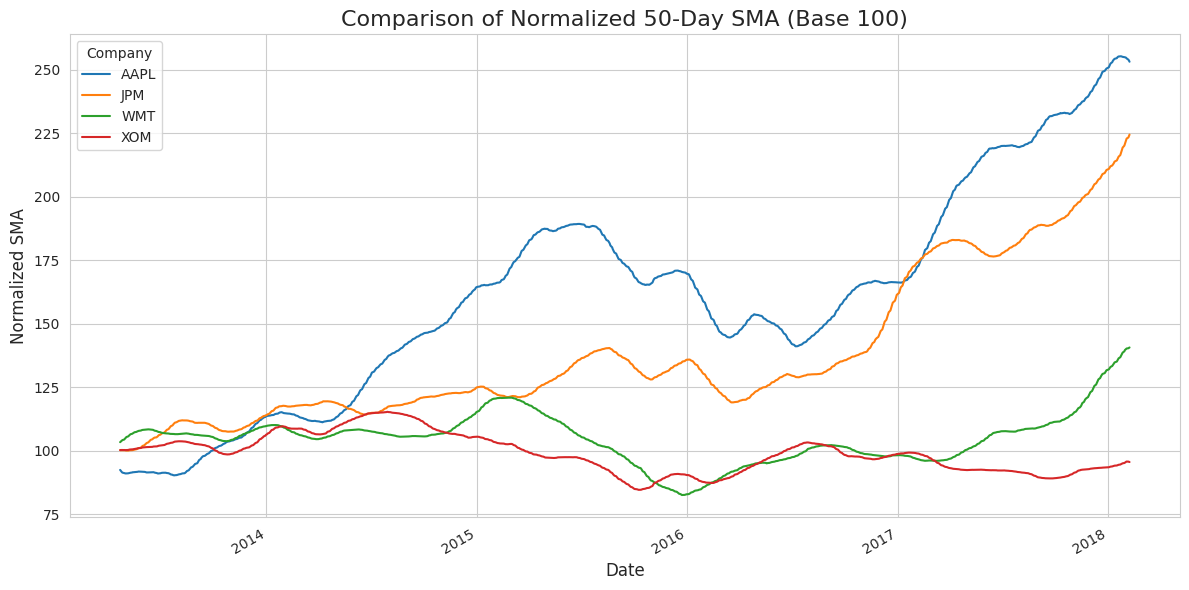

In [ ]:

    plt.figure(figsize=(12, 6))
    df_normalized_sma.plot(ax=plt.gca())
    plt.title(f'Comparison of Normalized {rolling_window}-Day SMA (Base 100)', fontsize=16)
    plt.ylabel('Normalized SMA', fontsize=12)
    plt.xlabel('Date', fontsize=12)
    plt.legend(title='Company')
    plt.tight_layout()
    plt.savefig('comparison_normalized_sma.png')
    plt.show()

# 50 Day Rolling Mean Volume

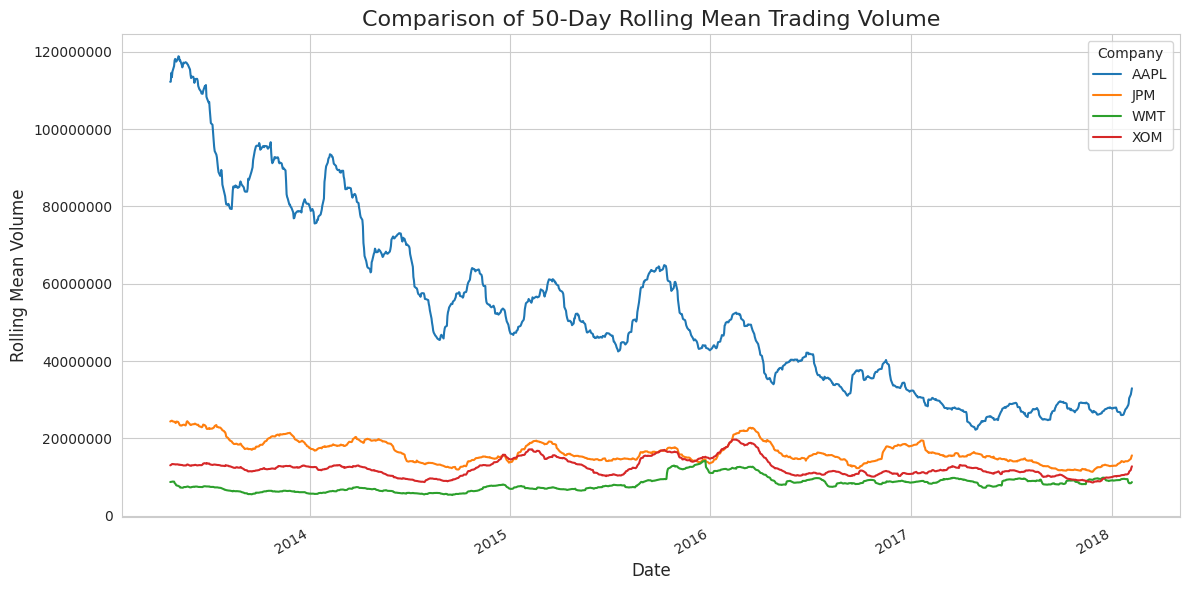

In [ ]:

    plt.figure(figsize=(12, 6))
    df_pivot_volume.plot(ax=plt.gca())
    plt.title(f'Comparison of {rolling_window}-Day Rolling Mean Trading Volume', fontsize=16)
    plt.ylabel('Rolling Mean Volume', fontsize=12)
    plt.xlabel('Date', fontsize=12)
    plt.ticklabel_format(style='plain', axis='y')
    plt.legend(title='Company')
    plt.tight_layout()
    plt.savefig('comparison_rolling_mean_volume.png')
    plt.show()

# 50 Day Rolling Mean Log Returns

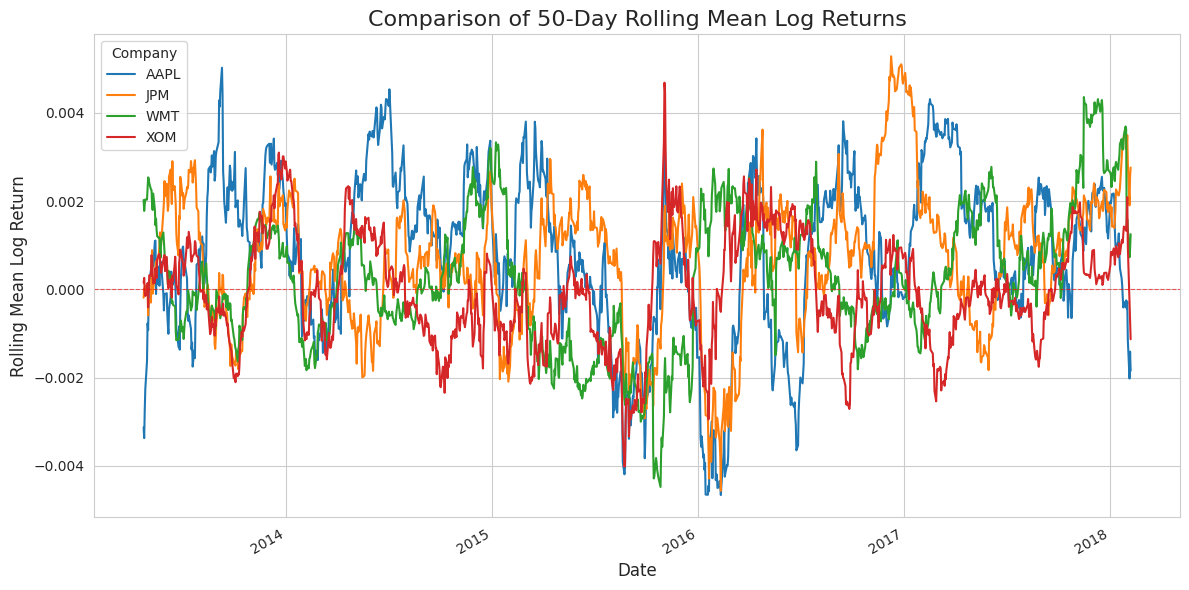

In [ ]:

    plt.figure(figsize=(12, 6))
    df_pivot_log_returns.plot(ax=plt.gca())
    plt.title(f'Comparison of {rolling_window}-Day Rolling Mean Log Returns', fontsize=16)
    plt.ylabel('Rolling Mean Log Return', fontsize=12)
    plt.xlabel('Date', fontsize=12)
    plt.axhline(0, color='red', linestyle='--', linewidth=0.8, alpha=0.6)
    plt.legend(title='Company')
    plt.tight_layout()
    plt.savefig('comparison_rolling_mean_log_returns.png')
    plt.show()


In [ ]:
print("\nFirst few rows of the generated multivariate features for AAPL:")
print(df_selected[df_selected['Name'] == 'AAPL'].tail())



First few rows of the generated multivariate features for AAPL:
           date     open    high       low   close    volume  Name  \
2513 2018-02-01  167.165  168.62  166.7600  167.78  47230787  AAPL   
2514 2018-02-02  166.000  166.80  160.1000  160.50  86593825  AAPL   
2515 2018-02-05  159.100  163.88  156.0000  156.49  72738522  AAPL   
2516 2018-02-06  154.830  163.72  154.0000  163.03  68243838  AAPL   
2517 2018-02-07  163.085  163.40  159.0685  159.54  51608580  AAPL   

      Log_Return    SMA_50  Volume_Roll_Mean  
2513    0.002088  172.8252       28988856.22  
2514   -0.044360  172.6356       30395483.78  
2515   -0.025302  172.3026       31347628.32  
2516    0.040942  172.0640       32200726.58  
2517   -0.021640  171.7554       32952364.72  


# Multivariate LSTM Closing Price Predicitons

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM model for AAPL (Lookback: 60, Features: 4)...
Training complete.
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


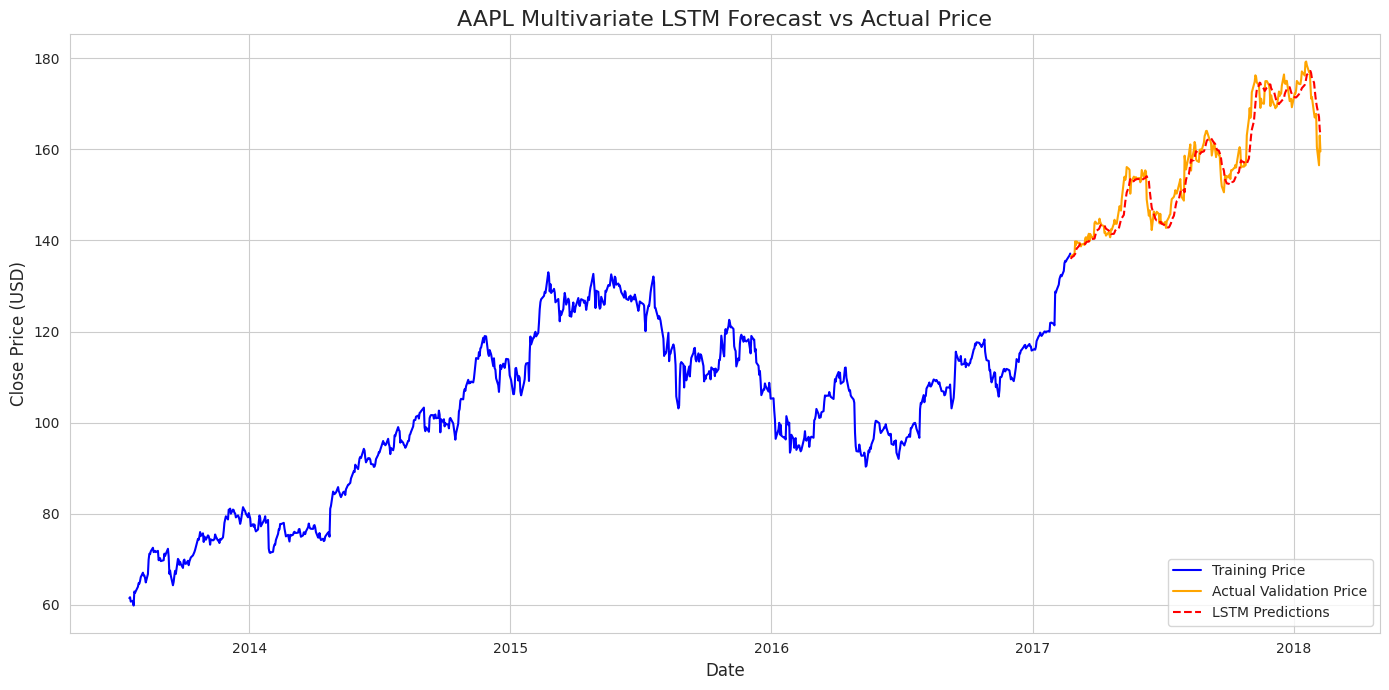


--- Model Performance Evaluation ---
Prediction Target: Next Day's Close Price
Features Used: ['close', 'SMA_50', 'Log_Return', 'Volume_Roll_Mean']
Root Mean Squared Error (RMSE): $3.0972
Mean Absolute Error (MAE): $2.3609

LSTM multivariate forecast plot generated successfully.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Define constants
LOOK_BACK = 60
TRAIN_RATIO = 0.8
COMPANY_TICKER = 'AAPL'
FILE_PATH = 'all_stocks_5yr.csv'
SELECTED_TICKERS = ['AAPL', 'JPM', 'WMT', 'XOM']
ROLLING_WINDOW = 50

def create_dataset(data, look_back=LOOK_BACK):
    """Creates time series sequences (X) and target values (Y)."""
    X, Y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, :]) # Sequence of 60 days (all 4 features)
        Y.append(data[i, 0])             # Close price for the 61st day
    return np.array(X), np.array(Y)

try:
    df_all = pd.read_csv(FILE_PATH)

    df_all['date'] = pd.to_datetime(df_all['date'])
    df_all = df_all.sort_values(by='date')

    df_selected = df_all[df_all['Name'].isin(SELECTED_TICKERS)].copy()

    df_selected['Log_Return'] = df_selected.groupby('Name')['close'].transform(
        lambda x: np.log(x / x.shift(1))
    )
    df_selected['SMA_50'] = df_selected.groupby('Name')['close'].transform(
        lambda x: x.rolling(window=ROLLING_WINDOW).mean()
    )
    df_selected['Volume_Roll_Mean'] = df_selected.groupby('Name')['volume'].transform(
        lambda x: x.rolling(window=ROLLING_WINDOW).mean()
    )

    #Clean AAPL Data
    df_aapl = df_selected[df_selected['Name'] == COMPANY_TICKER].sort_values(by='date')

    features = ['close', 'SMA_50', 'Log_Return', 'Volume_Roll_Mean']
    data = df_aapl.dropna(subset=features).copy()

    dates = data['date']

    # Convert to numpy array for scaling
    dataset = data[features].values

    #Scaling
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)

    # Split Data
    training_data_len = int(len(scaled_data) * TRAIN_RATIO)

    # Create training and test sequences
    X_train, Y_train = create_dataset(scaled_data[:training_data_len])
    X_test, Y_test = create_dataset(scaled_data[training_data_len - LOOK_BACK:])

    # Build and Train LSTM Model
    num_features = X_train.shape[2]

    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(LOOK_BACK, num_features)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    print(f"Training LSTM model for {COMPANY_TICKER} (Lookback: {LOOK_BACK}, Features: {num_features})...")
    model.fit(X_train, Y_train, batch_size=32, epochs=25, verbose=0)
    print("Training complete.")

    #Make Predictions and Evaluate
    predictions_scaled = model.predict(X_test)

    # Inverse transform predictions
    dummy_predictions = np.zeros((len(predictions_scaled), num_features))
    dummy_predictions[:, 0] = predictions_scaled.flatten()
    predictions_unscaled = scaler.inverse_transform(dummy_predictions)[:, 0]

    # Inverse transform the actual target values
    dummy_Y_test = np.zeros((len(Y_test), num_features))
    dummy_Y_test[:, 0] = Y_test
    Y_test_unscaled = scaler.inverse_transform(dummy_Y_test)[:, 0]

    # Calculate metrics
    rmse = math.sqrt(mean_squared_error(Y_test_unscaled, predictions_unscaled))
    mae = mean_absolute_error(Y_test_unscaled, predictions_unscaled)

    #Prepare and Visualize Results

    # The validation data starts at the index where training targets end in the main data set.
    test_start_index = training_data_len
    valid_dates = dates.iloc[test_start_index:]

    valid_dates = valid_dates.iloc[:len(Y_test_unscaled)]

    valid = pd.DataFrame({
        'Date': valid_dates.values,
        'Actual_Close': Y_test_unscaled,
        'Predictions': predictions_unscaled
    })

    # Prepare training set for plotting
    train_dates = dates.iloc[LOOK_BACK : training_data_len]
    train_close = data['close'].iloc[LOOK_BACK : training_data_len].values
    train = pd.DataFrame({
        'Date': train_dates.values,
        'Close': train_close
    })

    # Plotting
    plt.figure(figsize=(14, 7))
    plt.title(f'{COMPANY_TICKER} Multivariate LSTM Forecast vs Actual Price', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Close Price (USD)', fontsize=12)

    plt.plot(train['Date'], train['Close'], label='Training Price', color='blue')
    plt.plot(valid['Date'], valid['Actual_Close'], label='Actual Validation Price', color='orange')
    plt.plot(valid['Date'], valid['Predictions'], label='LSTM Predictions', color='red', linestyle='--')

    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.savefig('lstm_aapl_multivariate_forecast.png')
    plt.show()

    print("\n--- Model Performance Evaluation ---")
    print(f"Prediction Target: Next Day's Close Price")
    print(f"Features Used: {features}")
    print(f"Root Mean Squared Error (RMSE): ${rmse:.4f}")
    print(f"Mean Absolute Error (MAE): ${mae:.4f}")

    print("\nLSTM multivariate forecast plot generated successfully.")

except FileNotFoundError:
    print(f"🚨 ERROR: The file '{FILE_PATH}' was not found. Please ensure it is uploaded.")
except KeyError as e:
    print(f"⚠️ ERROR: Column not found: {e}. Check the exact casing of your column names in the CSV file.")
except Exception as e:
    print(f"An unexpected error occurred: {type(e).__name__}: {e}")

# Different Deep Learning Model Comparison


--- Model Training & Prediction ---
Training LSTM...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training GRU...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training CNN-BiLSTM...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


All model training and prediction complete.


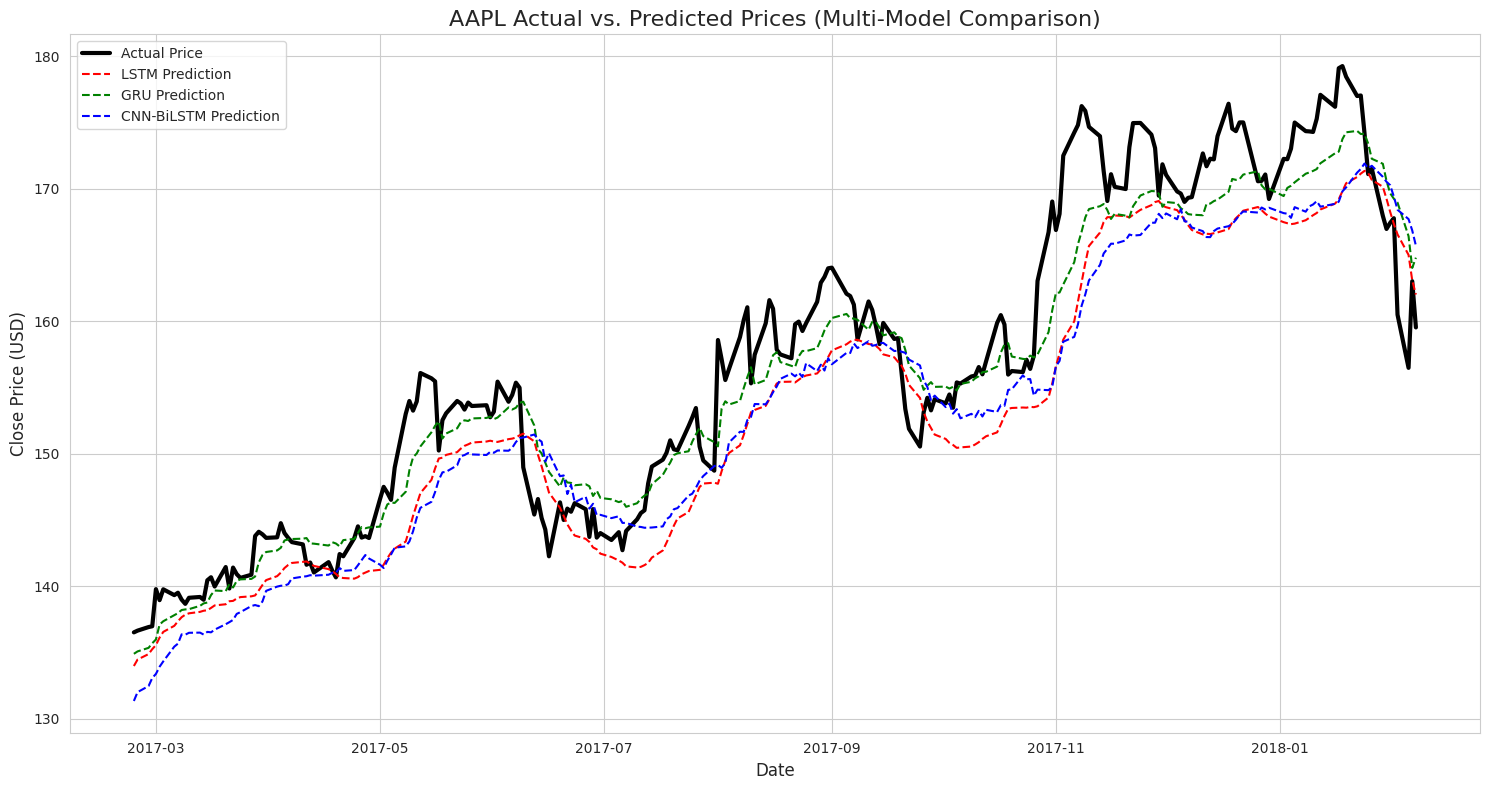


--- Model Performance Comparison (Test Set) ---
                RMSE       MAE
GRU         3.274243  2.517264
LSTM        5.152974  4.212313
CNN-BiLSTM  5.405251  4.433453

Note: Lower RMSE and MAE indicate better accuracy.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Conv1D, MaxPooling1D, Bidirectional, Flatten
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Define constants
LOOK_BACK = 60
TRAIN_RATIO = 0.8
COMPANY_TICKER = 'AAPL'
FILE_PATH = 'all_stocks_5yr.csv'
ROLLING_WINDOW = 50
SELECTED_TICKERS = ['AAPL', 'JPM', 'WMT', 'XOM']
FEATURES = ['close', 'SMA_50', 'Log_Return', 'Volume_Roll_Mean']
NUM_FEATURES = len(FEATURES)

# Helper Function to Create Sequences
def create_dataset(data, look_back=LOOK_BACK):
    """Creates time series sequences (X) and target values (Y)."""
    X, Y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, :])
        Y.append(data[i, 0]) # 'close' is the first column (index 0)
    return np.array(X), np.array(Y)

#Model Building Functions

def build_lstm_model(look_back, num_features):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, num_features)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def build_gru_model(look_back, num_features):
    model = Sequential()
    model.add(GRU(units=50, return_sequences=True, input_shape=(look_back, num_features)))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def build_cnn_bilstm_model(look_back, num_features):
    model = Sequential()
    # 1D Convolutional Layer for feature extraction
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(look_back, num_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))
    # Bidirectional LSTM Layer
    model.add(Bidirectional(LSTM(units=50, return_sequences=False)))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

try:
    # 1. Load, Feature Engineer, and Clean Data
    df_all = pd.read_csv(FILE_PATH)
    df_all['date'] = pd.to_datetime(df_all['date'])
    df_selected = df_all[df_all['Name'].isin(SELECTED_TICKERS)].copy()

    df_selected['Log_Return'] = df_selected.groupby('Name')['close'].transform(lambda x: np.log(x / x.shift(1)))
    df_selected['SMA_50'] = df_selected.groupby('Name')['close'].transform(lambda x: x.rolling(window=ROLLING_WINDOW).mean())
    df_selected['Volume_Roll_Mean'] = df_selected.groupby('Name')['volume'].transform(lambda x: x.rolling(window=ROLLING_WINDOW).mean())

    df_aapl = df_selected[df_selected['Name'] == COMPANY_TICKER].sort_values(by='date')
    data = df_aapl.dropna(subset=FEATURES).copy()
    dates = data['date']
    dataset = data[FEATURES].values

    # 2. Scaling and Splitting
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    training_data_len = int(len(scaled_data) * TRAIN_RATIO)

    X_train, Y_train = create_dataset(scaled_data[:training_data_len])
    X_test, Y_test = create_dataset(scaled_data[training_data_len - LOOK_BACK:])

    # 3. Train Models and Predict
    model_configs = {
        'LSTM': build_lstm_model,
        'GRU': build_gru_model,
        'CNN-BiLSTM': build_cnn_bilstm_model
    }

    predictions = {}
    metrics = {}

    dummy_Y_test = np.zeros((len(Y_test), NUM_FEATURES))
    dummy_Y_test[:, 0] = Y_test
    Y_test_unscaled = scaler.inverse_transform(dummy_Y_test)[:, 0]

    print("\n--- Model Training & Prediction ---")
    for name, builder in model_configs.items():
        print(f"Training {name}...")
        model = builder(LOOK_BACK, NUM_FEATURES)
        # Using fewer epochs for faster demonstration
        model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=0)

        # Predict and Inverse Transform
        predictions_scaled = model.predict(X_test, verbose=0)
        dummy_predictions = np.zeros((len(predictions_scaled), NUM_FEATURES))
        dummy_predictions[:, 0] = predictions_scaled.flatten()
        predictions_unscaled = scaler.inverse_transform(dummy_predictions)[:, 0]

        predictions[name] = predictions_unscaled

        # Calculate Metrics
        rmse = math.sqrt(mean_squared_error(Y_test_unscaled, predictions_unscaled))
        mae = mean_absolute_error(Y_test_unscaled, predictions_unscaled)
        metrics[name] = {'RMSE': rmse, 'MAE': mae}

    print("All model training and prediction complete.")

    # 4. Prepare DataFrames for Plotting and Metrics Table
    test_start_index = training_data_len
    valid_dates = dates.iloc[test_start_index:]
    valid_dates = valid_dates.iloc[:len(Y_test_unscaled)] # CRITICAL FIX: Match length

    results_df = pd.DataFrame({
        'Date': valid_dates.values,
        'Actual_Close': Y_test_unscaled
    })

    # Add all predictions to the results DataFrame
    for name, preds in predictions.items():
        results_df[f'{name}_Pred'] = preds

    # 5. Comparative Plotting
    plt.figure(figsize=(15, 8))
    plt.title(f'{COMPANY_TICKER} Actual vs. Predicted Prices (Multi-Model Comparison)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Close Price (USD)', fontsize=12)

    plt.plot(results_df['Date'], results_df['Actual_Close'], label='Actual Price', color='black', linewidth=3)

    # Plotting each model's prediction
    colors = {'LSTM': 'red', 'GRU': 'green', 'CNN-BiLSTM': 'blue'}
    for name, color in colors.items():
        plt.plot(results_df['Date'], results_df[f'{name}_Pred'], label=f'{name} Prediction', color=color, linestyle='--')

    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.savefig('comparative_forecast_plot.png')
    plt.show()

    # 6. Display Performance Metrics
    metrics_df = pd.DataFrame.from_dict(metrics, orient='index')
    print("\n--- Model Performance Comparison (Test Set) ---")
    print(metrics_df.sort_values(by='RMSE'))
    print("\nNote: Lower RMSE and MAE indicate better accuracy.")

except FileNotFoundError:
    print(f"🚨 ERROR: The file '{FILE_PATH}' was not found. Please ensure it is uploaded.")
except KeyError as e:
    print(f"⚠️ ERROR: Column not found: {e}. Check the exact casing of your column names in the CSV file.")
except Exception as e:
    print(f"An unexpected error occurred: {type(e).__name__}: {e}")

# Univariate vs Multivariate LSTM Comparison


Training Multivariate LSTM...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training Univariate LSTM...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


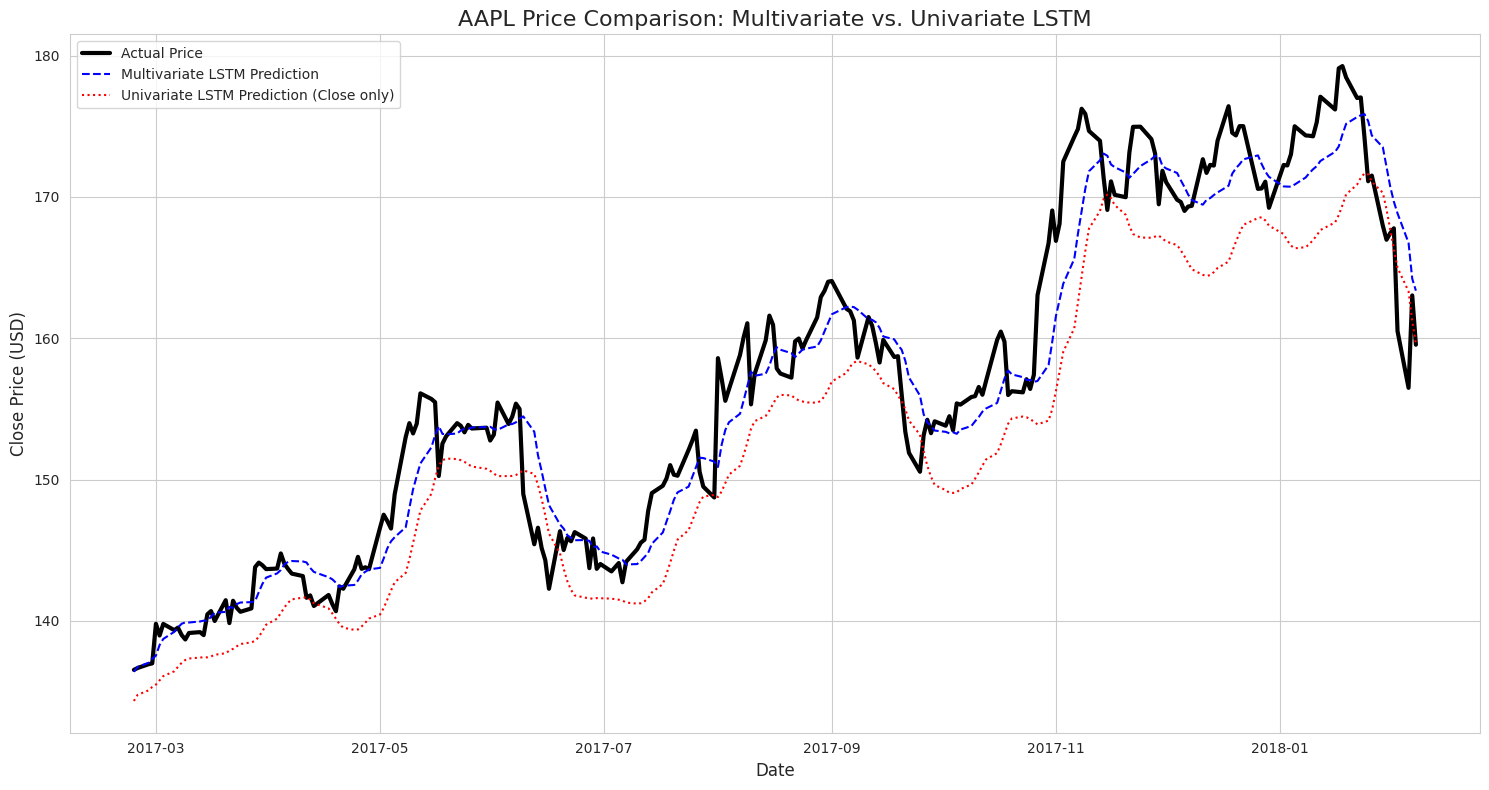


--- Model Accuracy Comparison (Test Set) ---
                  RMSE       MAE
Multivariate  2.998168  2.228808
Univariate    5.328956  4.485676

Note: Lower RMSE and MAE indicate better accuracy.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Define constants
LOOK_BACK = 60
TRAIN_RATIO = 0.8
COMPANY_TICKER = 'AAPL'
FILE_PATH = 'all_stocks_5yr.csv'
ROLLING_WINDOW = 50
SELECTED_TICKERS = ['AAPL', 'JPM', 'WMT', 'XOM']
# Features for Multivariate model (Multivariate features must start with 'close')
MULTI_FEATURES = ['close', 'SMA_50', 'Log_Return', 'Volume_Roll_Mean']
# Features for Univariate model
UNI_FEATURES = ['close']

#Helper Function to Create Sequences
def create_dataset(data, look_back):
    """Creates time series sequences (X) and target values (Y)."""
    X, Y = [], []

    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, :])
        Y.append(data[i, 0])
    return np.array(X), np.array(Y)

#Model Building Function
def build_lstm_model(look_back, num_features):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, num_features)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

try:
    # 1. Load and Feature Engineer Data
    df_all = pd.read_csv(FILE_PATH)
    df_all['date'] = pd.to_datetime(df_all['date'])
    df_selected = df_all[df_all['Name'].isin(SELECTED_TICKERS)].copy()

    # Feature Engineering (Needed for the multivariate case)
    df_selected['Log_Return'] = df_selected.groupby('Name')['close'].transform(lambda x: np.log(x / x.shift(1)))
    df_selected['SMA_50'] = df_selected.groupby('Name')['close'].transform(lambda x: x.rolling(window=ROLLING_WINDOW).mean())
    df_selected['Volume_Roll_Mean'] = df_selected.groupby('Name')['volume'].transform(lambda x: x.rolling(window=ROLLING_WINDOW).mean())

    df_aapl = df_selected[df_selected['Name'] == COMPANY_TICKER].sort_values(by='date')

    # Clean data (NaNs from rolling window/shift)
    data_all_features = df_aapl.dropna(subset=MULTI_FEATURES).copy()

    # Save the cleaned dates
    dates = data_all_features['date']

    # 2. Scaling and Splitting (Multivariate Case)
    dataset_multi = data_all_features[MULTI_FEATURES].values
    num_features_multi = len(MULTI_FEATURES)

    scaler_multi = MinMaxScaler(feature_range=(0, 1))
    scaled_data_multi = scaler_multi.fit_transform(dataset_multi)

    training_data_len = int(len(scaled_data_multi) * TRAIN_RATIO)

    X_train_multi, Y_train_multi = create_dataset(scaled_data_multi[:training_data_len], LOOK_BACK)
    X_test_multi, Y_test_multi = create_dataset(scaled_data_multi[training_data_len - LOOK_BACK:], LOOK_BACK)

    # 3. Scaling and Splitting
    dataset_uni = data_all_features[UNI_FEATURES].values
    num_features_uni = len(UNI_FEATURES)

    scaler_uni = MinMaxScaler(feature_range=(0, 1))
    # Reshape
    scaled_data_uni = scaler_uni.fit_transform(dataset_uni.reshape(-1, 1))

    X_train_uni, Y_train_uni = create_dataset(scaled_data_uni[:training_data_len], LOOK_BACK)
    X_test_uni, Y_test_uni = create_dataset(scaled_data_uni[training_data_len - LOOK_BACK:], LOOK_BACK)

    # 4. Train and Predict Models
    predictions = {}
    metrics = {}

    # A. Multivariate Model
    print("\nTraining Multivariate LSTM...")
    model_multi = build_lstm_model(LOOK_BACK, num_features_multi)
    model_multi.fit(X_train_multi, Y_train_multi, batch_size=32, epochs=20, verbose=0)

    predictions_scaled_multi = model_multi.predict(X_test_multi, verbose=0)

    # Inverse transform multi
    dummy_predictions_multi = np.zeros((len(predictions_scaled_multi), num_features_multi))
    dummy_predictions_multi[:, 0] = predictions_scaled_multi.flatten()
    predictions['Multivariate_Pred'] = scaler_multi.inverse_transform(dummy_predictions_multi)[:, 0]

    #B. Univariate Model
    print("Training Univariate LSTM...")
    model_uni = build_lstm_model(LOOK_BACK, num_features_uni)
    model_uni.fit(X_train_uni, Y_train_uni, batch_size=32, epochs=20, verbose=0)

    predictions_scaled_uni = model_uni.predict(X_test_uni, verbose=0)

    # Inverse transform uni (using dummy array fitted to 1 column)
    dummy_predictions_uni = np.zeros((len(predictions_scaled_uni), num_features_uni))
    dummy_predictions_uni[:, 0] = predictions_scaled_uni.flatten()
    predictions['Univariate_Pred'] = scaler_uni.inverse_transform(dummy_predictions_uni)[:, 0]

    # 5. Inverse Transform Actuals (from the Univariate scaler, since it's just the price)
    # The actuals length is the same for both tests (Y_test_multi, Y_test_uni)
    dummy_Y_test = np.zeros((len(Y_test_uni), num_features_uni))
    dummy_Y_test[:, 0] = Y_test_uni
    Y_test_unscaled = scaler_uni.inverse_transform(dummy_Y_test)[:, 0]

    # 6. Calculate Metrics
    metrics['Multivariate'] = {
        'RMSE': math.sqrt(mean_squared_error(Y_test_unscaled, predictions['Multivariate_Pred'])),
        'MAE': mean_absolute_error(Y_test_unscaled, predictions['Multivariate_Pred'])
    }
    metrics['Univariate'] = {
        'RMSE': math.sqrt(mean_squared_error(Y_test_unscaled, predictions['Univariate_Pred'])),
        'MAE': mean_absolute_error(Y_test_unscaled, predictions['Univariate_Pred'])
    }

    # 7. Prepare and Visualize Results
    test_start_index = training_data_len
    valid_dates = dates.iloc[test_start_index:]
    valid_dates = valid_dates.iloc[:len(Y_test_unscaled)] # Match length for plotting

    results_df = pd.DataFrame({
        'Date': valid_dates.values,
        'Actual_Close': Y_test_unscaled,
        'Multivariate_Pred': predictions['Multivariate_Pred'],
        'Univariate_Pred': predictions['Univariate_Pred']
    })

    # Plotting
    plt.figure(figsize=(15, 8))
    plt.title(f'{COMPANY_TICKER} Price Comparison: Multivariate vs. Univariate LSTM', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Close Price (USD)', fontsize=12)

    plt.plot(results_df['Date'], results_df['Actual_Close'], label='Actual Price', color='black', linewidth=3)
    plt.plot(results_df['Date'], results_df['Multivariate_Pred'], label='Multivariate LSTM Prediction', color='blue', linestyle='--')
    plt.plot(results_df['Date'], results_df['Univariate_Pred'], label='Univariate LSTM Prediction (Close only)', color='red', linestyle=':')

    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.savefig('uni_vs_multi_comparison.png')
    plt.show()

    # 8. Display Performance Metrics
    metrics_df = pd.DataFrame.from_dict(metrics, orient='index')
    print("\n--- Model Accuracy Comparison (Test Set) ---")
    print(metrics_df.sort_values(by='RMSE'))
    print("\nNote: Lower RMSE and MAE indicate better accuracy.")

except FileNotFoundError:
    print(f"🚨 ERROR: The file '{FILE_PATH}' was not found. Please ensure it is uploaded.")
except KeyError as e:
    print(f"⚠️ ERROR: Column not found: {e}. Check the exact casing of your column names in the CSV file.")
except Exception as e:
    print(f"An unexpected error occurred: {type(e).__name__}: {e}")